In [7]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [8]:
%matplotlib inline

In [9]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_jone.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_jone.pkl")

In [10]:
betas = res_ex["betas"]

In [11]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.030 std_fe: 3.04E-02 M: 0.011 S: 0.683 E: -0.203: 0.0339, B1 = -0.002
fe: -3.661 std_fe: 5.53E-02 M: 0.010 S: 0.656 E: -0.380: 0.0211, B1 = 0.004
fe: -2.597 std_fe: 7.26E-02 M: 0.008 S: 0.612 E: -0.557: 0.0185, B1 = -0.004
fe: -2.106 std_fe: 8.15E-02 M: 0.010 S: 0.559 E: -0.709: 0.0292, B1 = -0.003
fe: -1.844 std_fe: 8.14E-02 M: 0.009 S: 0.488 E: -0.868: 0.0204, B1 = -0.004
fe: -1.691 std_fe: 7.54E-02 M: 0.011 S: 0.422 E: -0.987: 0.0219, B1 = -0.011
fe: -1.596 std_fe: 7.16E-02 M: 0.013 S: 0.368 E: -1.071: 0.0213, B1 = 0.0463
fe: -1.535 std_fe: 6.67E-02 M: 0.020 S: 0.326 E: -1.127: 0.0229, B1 = 0.0098
fe: -1.491 std_fe: 6.31E-02 M: 0.010 S: 0.297 E: -1.160: 0.0234, B1 = -0.024
fe: -1.459 std_fe: 5.71E-02 M: 0.009 S: 0.275 E: -1.184: 0.0189, B1 = -0.005
fe: -1.435 std_fe: 5.05E-02 M: 0.004 S: 0.254 E: -1.204: 0.0558, B1 = 0.0206
fe: -1.416 std_fe: 4.81E-02 M: 0.012 S: 0.243 E: -1.213: 0.0684, B1 = 0.0056
fe: -1.400 std_fe: 4.40E-02 M: 0.025 S: 0.232 E: -1.222: 0.0274, B1 = 0.0271


In [12]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.031 std_fe: 2.68E-02 M: 0.008 S: 0.684 E: -0.196: 0.0212, B1 = 0.038
fe: -3.663 std_fe: 4.39E-02 M: 0.010 S: 0.654 E: -0.393: 0.0344, B1 = 0.167
fe: -2.603 std_fe: 5.61E-02 M: 0.006 S: 0.610 E: -0.568: 0.0206, B1 = 0.208
fe: -2.116 std_fe: 6.05E-02 M: 0.008 S: 0.551 E: -0.738: 0.0269, B1 = 0.206
fe: -1.857 std_fe: 5.81E-02 M: 0.006 S: 0.484 E: -0.889: 0.0464, B1 = 0.222
fe: -1.707 std_fe: 5.02E-02 M: 0.012 S: 0.413 E: -1.019: 0.0374, B1 = 0.284
fe: -1.614 std_fe: 4.03E-02 M: 0.008 S: 0.358 E: -1.103: 0.0214, B1 = 0.389
fe: -1.554 std_fe: 3.08E-02 M: 0.013 S: 0.317 E: -1.158: 0.0195, B1 = 0.461
fe: -1.512 std_fe: 2.15E-02 M: 0.011 S: 0.285 E: -1.196: 0.0237, B1 = 0.482
fe: -1.482 std_fe: 1.66E-02 M: 0.003 S: 0.268 E: -1.213: 0.0142, B1 = 0.535
fe: -1.458 std_fe: 1.19E-02 M: 0.005 S: 0.253 E: -1.228: 0.0115, B1 = 0.565
fe: -1.439 std_fe: 8.89E-03 M: 0.012 S: 0.244 E: -1.235: 0.0284, B1 = 0.567
fe: -1.424 std_fe: 8.85E-03 M: 0.005 S: 0.239 E: -1.240: 0.0206, B1 = 0.583
fe: -1.411 s

In [13]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.032 std_fe: 3.40E-05 M: 0.006 S: 0.683 E: -0.199: 0.0266, B1 = 0.000
fe: -3.666 std_fe: 6.69E-05 M: 0.035 S: 0.653 E: -0.401: 0.0276, B1 = -0.001
fe: -2.611 std_fe: 9.62E-05 M: 0.030 S: 0.604 E: -0.598: 0.0278, B1 = 0.001
fe: -2.129 std_fe: 1.27E-04 M: -0.026 S: 0.544 E: -0.769 0.0249, B1 = -0.022
fe: -1.872 std_fe: 1.67E-04 M: 0.016 S: 0.482 E: -0.909: 0.0284, B1 = -0.016
fe: -1.720 std_fe: 1.72E-04 M: 0.025 S: 0.423 E: -1.014: 0.0181, B1 = 0.028
fe: -1.625 std_fe: 2.09E-04 M: -0.016 S: 0.367 E: -1.100 0.0309, B1 = 0.0246
fe: -1.561 std_fe: 2.09E-04 M: 0.022 S: 0.328 E: -1.151: 0.0225, B1 = -0.004
fe: -1.517 std_fe: 2.04E-04 M: 0.012 S: 0.304 E: -1.180: 0.0273, B1 = 0.0186
fe: -1.484 std_fe: 2.50E-04 M: 0.014 S: 0.281 E: -1.204: 0.0405, B1 = 0.0396
fe: -1.460 std_fe: 2.47E-04 M: -0.038 S: 0.262 E: -1.222 0.0209, B1 = -0.031
fe: -1.440 std_fe: 3.01E-04 M: -0.045 S: 0.251 E: -1.231 0.0366, B1 = 0.0151
fe: -1.424 std_fe: 3.79E-04 M: -0.084 S: 0.241 E: -1.238 0.0116, B1 = -0.007
fe

In [14]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.031, ener: -0.199, M: 0.000, iter 8
fe: -3.664, ener: -0.395, M: 0.000, iter 10
fe: -2.606, ener: -0.583, M: 0.000, iter 14
fe: -2.123, ener: -0.760, M: 0.000, iter 22
fe: -1.867, ener: -0.924, M: 0.000, iter 36
fe: -1.722, ener: -1.074, M: 0.000, iter 109
fe: -1.620, ener: -1.180, M: 0.346, iter 1000
fe: -1.559, ener: -1.218, M: 0.401, iter 1000
fe: -1.565, ener: -1.434, M: 0.631, iter 1000
fe: -1.487, ener: -1.298, M: 0.657, iter 1000
fe: -1.451, ener: -1.267, M: 0.514, iter 1000
fe: -1.430, ener: -1.288, M: 0.533, iter 1000
fe: -1.392, ener: -1.275, M: 0.729, iter 1000
fe: -1.385, ener: -1.286, M: 0.737, iter 1000
fe: -1.392, ener: -1.323, M: 0.761, iter 1000
fe: -1.388, ener: -1.445, M: 0.875, iter 1000
fe: -1.686, ener: -1.550, M: 0.666, iter 1000
fe: -1.465, ener: -1.398, M: 0.811, iter 1000
fe: -1.394, ener: -1.387, M: 0.881, iter 1000
fe: -1.482, ener: -1.422, M: 0.784, iter 1000


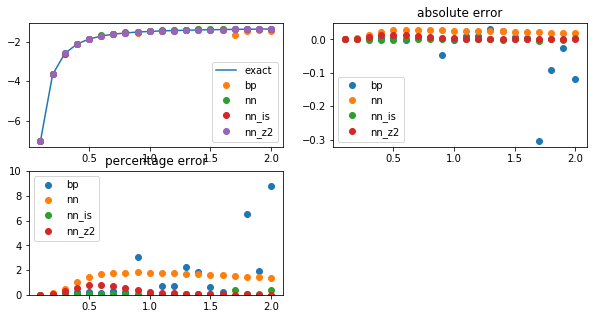

In [22]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2], init_=0)
plt.ylim(-0.001,10)
plt.show()

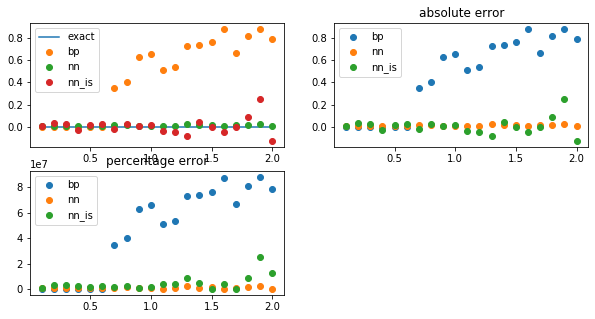

In [16]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

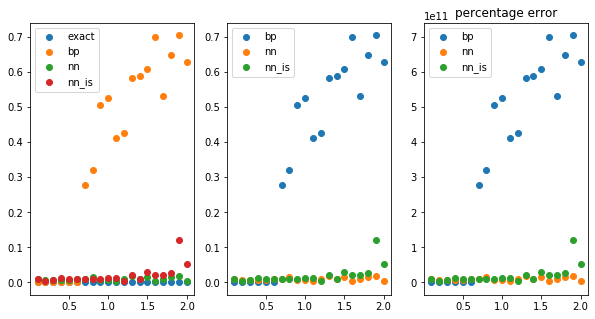

In [17]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

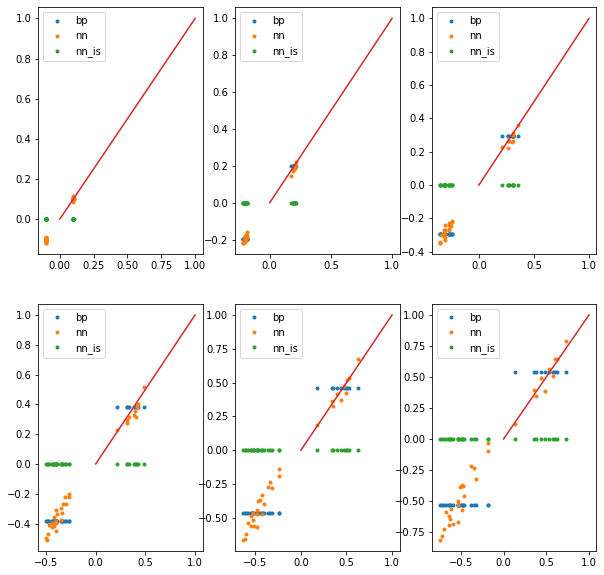

In [18]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()